# Question 5

You are required to write code to implement either time-series clustering or density-based clustering model using the above dataset (Question_1). If you select density-based clustering approach to achieve the task, you are going to cover the following steps:
* Importing required libraries
* Load the dataset (Question 1)  into a DataFrame object
* Visualize the data, use only two of these attributes at the time
* You may need to normalise the attribute if necessary
* Show positive correlation between attributes if necessary
* Construct a density-based clustering model and extract cluster labels and     outliers to plot your results. 




# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [ ]:
loans = pd.read_csv("loan_database_2019.csv")

df = loans.filter(['purpose', 'loan_amnt','fico_range_low','fico_range_high', 'loan_status'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Transform Data

In [ ]:
# FICO VARIABLE
df[['fico_range_low','fico_range_high']].corr()
df['fico'] = 0.5*df['fico_range_low'] + 0.5*df['fico_range_high']
df['fico'].fillna(df['fico'].mean(), inplace=True)
df['fico'] = df['fico'].astype(int)
df.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

In [ ]:
#LOAN_STATUS VARIABLE
status = {'Charged Off':0, 'Fully Paid': 1}
df['loan_status'] = df['loan_status'].map(status)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288459 entries, 0 to 288458
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   purpose      288451 non-null  object 
 1   loan_amnt    288451 non-null  float64
 2   loan_status  54167 non-null   float64
 3   fico         288459 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 8.8+ MB


In [ ]:
df.to_csv("dbscan_data.csv")

# Visualise Data

In [ ]:
df['purpose'].unique()

array(['major_purchase', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'other', 'medical', 'car',
       'moving', 'house', 'vacation', 'renewable_energy', nan],
      dtype=object)

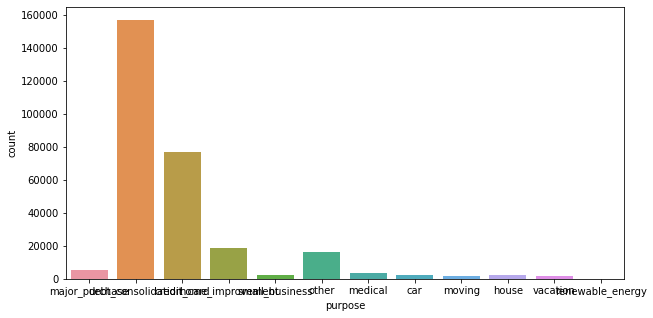

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', data=df)

# Splitting Data

In [ ]:
data = df.iloc[:,1:4]
target =df.iloc[:,0]

# Normalise Data

In [ ]:
data = StandardScaler().fit_transform(data)
data

array([[ 0.71371495,         nan, -1.19389724],
       [ 0.18416562,         nan,  0.65433023],
       [ 0.71371495,         nan, -0.62521186],
       ...,
       [-0.57405272,         nan, -0.34086918],
       [-0.05653861,  0.5008537 , -1.33606858],
       [-0.44166539,         nan, -0.19869783]])

#  Clustering Model 

In [ ]:
data, labels_true = make_blobs(n_samples=1000,  cluster_std=0.4, random_state=0)

In [ ]:
db = DBSCAN(eps= 0.1, min_samples= 5).fit(data)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Clustering Lables

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 14
Estimated number of noise points: 259
Homogeneity: 0.744
Completeness: 0.454
V-measure: 0.564
Adjusted Rand Index: 0.461
Adjusted Mutual Information: 0.559
Silhouette Coefficient: -0.107


# Plotting Results

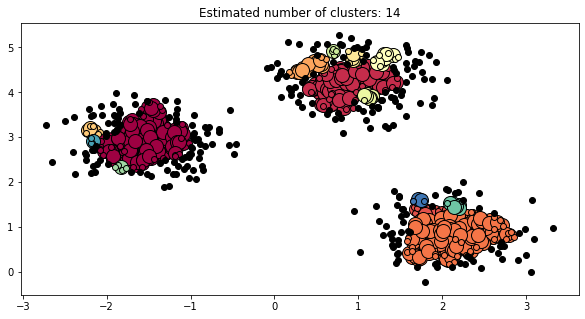

In [ ]:
# Black removed and is used for noise instead.
plt.figure(figsize=(10,5))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
#End of Question